# ECE6790 Homework 1

Welcome to ECE 6790! In this homework assignment, we will look into the basic strategy of an Leak Integrate Fire (LIF) Neuron, and expand the LIF neurons to the dimension of 2D convolution.

This assignment is a warmup before diving into the detailed SNN training. Students are expected to have a basic understanding of spikes and spiking neuron with actual data samples.

## Objective
0. Visualize and understand the spike train of a datasaet captured by the dynamic vision sensor (DVS).
1. Combine the LIF module with 2D convolution operation.
2. Evaluate the module with a pre-processed sample from [CIFAR10-DVS](https://www.frontiersin.org/articles/10.3389/fnins.2017.00309/full) dataset.
3. How to compute the gradient of the LIF module?

## Before we start...

Given the popularity of PyTorch in **both** academia and industry, we recommand to design your module with PyTorch.

### Resources:
- PyTorch Documentation: [[Link]](https://pytorch.org/docs/stable/index.html)
- PyTorch Basics: [[Link]](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

### Google Colab:
- GPU usage: Go to `Runtime` -> `Change runtime type` ->  Select T4 GPU (no membership) or A100, V100 GPU (with membership ⭐).

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from PIL import Image
import imageio.v2 as imageio
import cv2

FRAME_PATH = "./frames"
os.makedirs(FRAME_PATH, exist_ok=True)

## Load and Visualize the Sample DVS Data

In this assignment, students will use a pre-processed data sample (Tensor file `.pt`) from the CIFAR10-DVS dataset.

- First, let's load the data and check the size of the tensor.
- **Important Note❗:** Upload the `00392.pt` file to Google Colab before proceed.

In [2]:
# load the tensor
tensor = torch.load("./0392.pt")

# convert the tensor to numpy array
tensor_np = tensor.permute(0,2,3,1).numpy()

The loaded tensor is a "train of tensors" with the shape of [T, C, H, W], representing time, channel, height, and width dimension.

To match the dimension with the normal RGB image, we preprocessed the DVS data sample with the channel dimension = 3.

Besides that, the selected sample is recorded on across 32 time steps with height and width = (128 $\times$ 128).

In [3]:
print(f"Shape of the DVS sample = {list(tensor.size())}")

Shape of the DVS sample = [32, 3, 128, 128]


Now we can visualize the generated event by generating the frame-by-frame video (.gif) by treating the DVS tensor as frames.

In [4]:
for f in range(tensor.size(0)):
  im = Image.fromarray(tensor_np[f], 'RGB')
  im.save(os.path.join(FRAME_PATH, f"img{f}.png"))

In [5]:
with imageio.get_writer('./airplane.gif', mode='I') as writer:
    for f in range(tensor.size(0)):
      filepath = os.path.join(FRAME_PATH, f"img{f}.png")
      image = imageio.imread(filepath)
      writer.append_data(image)

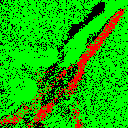

In [8]:
from IPython.display import Image
Image(open('./airplane.gif','rb').read())

As shown in the animation above, the object (airplane) is captured by the DVS sensor with **motion**. While the static background shows **ZERO** pixel dynamics and remains silent (black).

🆒 Besides the motion capture, what makes the dynamics really energy efficient is the **Binary representation**. In particular, all the pixels in each time step on contains Low (0) and High (255 or 1):

In [10]:
print(f"Unique values of the DVS data = {tensor.unique()/255}")

Unique values of the DVS data = tensor([0., 1.])


## Create a LIF Neuron

Now lets create a spike neuron to process the sample data.

You need to do:
1. ⛳**[Coding]:** Create a customized `torch.nn.Module` [[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) to implement your LIF neuron.
2. ❓**[Question:]** Given a 2-dimensional convolutional layer (`torch.nn.Conv2d`)[[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) with weight and input, what should be the **input** of the LIF neuron?
3. ⛳**[Coding]:** Combine the convolutional layer with the LIF neuron that you created.
4. ⛳**[Coding]:** Pass the input tensor `tensor` (not the numpy array (`np.array`)) into the module, and compare the output with the goden results.

**Important Requirement:** The forward pass of the Conv2d + LIF neuron should be executed on **GPU**.

### ⭐ Configuration of the LIF Neuron:
- Spike Threshold = 0.5
- Penalty factor = 0.1
- Output channel dimension = 16
- Stride of convolution = 3
- Padding = 0

In [13]:
## Your code starts here.

# class LIF()

# class ConvLIF()

❓**[Question:]** Given a 2-dimensional convolutional layer (`torch.nn.Conv2d`)[[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) with weight and input, what should be the **input** of the LIF neuron?

📓 **Your answer of the question:**

...

## Evaluate the customized LIF Module

In [14]:
## Forward pass (uncomment this after you finish your implementation)

# out = ConvLIF(tensor)

## Backward propagation of the LIF module

Similar to what we learned from the lecture, the firing process of a Spiking neuron can be modeled as a Heaviside step function. Apparently, the step transition is non-differentiable in the backward pass.

Given the input $X$, weight $W$, the spike $S$ is generated as:

$$
Y = X * W
$$

$$
S = \theta(Y)
$$

Where $\theta$ is the non-differentiable step function.

If we want to compute the gradient of the weight $W$ with respect to the final loss (let's assume we will have one) $L$, the chain rule tells us:

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial S} \frac{\partial S}{\partial Y}
$$

However, it is easy to tell that ${\partial S}/{\partial Y}$ is not accessible due to the non-differentiable step function, what should we do?

❓**[Question]** We will look into the detailed coding in our next assignment. For now, please briefly provide your thoughts on how to tackle this problem.


📓 **Your answer of the question:**

...
